In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import joblib
import ast

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
Features = ['Speical_Char','Have_IP', 'Have_At','URL_length' ,'URL_Depth','redirection', 'time_get_redirect',
                        'port_in_url','use_http', 'http_in_domain','TinyURL', 'Prefix/Suffix', 'DNS_Record','trusted_ca',
                        'domain_lifespan', 'domain_timeleft', 'same_asn','iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards','eval','unescape',
                        'escape', 'ActiveXObject','fromCharCode','atob','Punny_Code']

In [2]:
df_origin = pd.read_csv("dataset/chongluadaov2.csv")
del df_origin['type']
# df_train = pd.read_csv("cld.csv",names= ['url','features','labels'])

In [13]:
df_train['labels'].dtype

dtype('int64')

In [6]:
df_origin['labels'].dtype

dtype('int64')

In [7]:
inner = pd.merge(left=df_origin, right=df_train, left_on=['url','labels'], right_on=['url','labels'],how='left')
# del inner['urls']

In [8]:
inner.dropna(subset = ["features"], inplace=True)
inner

,url,labels,type,features
5,http://jezebel.com/goodbye-revenge-ill-miss-ou...,0,train,"[2, 0, 0, 1, 1, 5, 1, 0, 1, 0, 0, 0, 0, 1, 0, ..."
12,http://wickedweaver.com/,1,train,"[2, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 1, 0, ..."
16,https://mail.google.com/a/recordedbooks.com,0,val,"[4, 0, 0, 0, 2, 6, 1, 0, 0, 0, 0, 0, 0, 1, 0, ..."
33,http://richsportsmgmt.com/media/mod_languages/...,1,test,"[3, 0, 0, 1, 4, 5, 0, 0, 1, 0, 1, 0, 0, 1, 0, ..."
35,http://www.i-m.mx/WEBMASTER8d/emailquota/,1,train,"[3, 0, 0, 0, 2, 5, 1, 0, 1, 0, 0, 1, 0, 1, 0, ..."
...,...,...,...,...
124328,https://plus.google.com/+Duoborgatto,0,train,"[4, 0, 0, 0, 1, 6, 1, 0, 0, 0, 0, 0, 0, 1, 0, ..."
124330,https://www.ringcentral.com/products/sf2002.asp,0,val,"[4, 0, 0, 0, 2, 6, 1, 0, 0, 0, 0, 0, 0, 1, 0, ..."
124331,https://plus.google.com/+BeautymissionPl/posts,0,val,"[4, 0, 0, 0, 2, 6, 1, 0, 0, 0, 0, 0, 0, 1, 0, ..."
124332,https://bit.ly/3vAfEWG,1,train,"[2, 0, 0, 0, 1, 6, 1, 1, 0, 0, 1, 0, 0, 1, 0, ..."


In [41]:
list(df_train['labels']).count(0)

59399

In [4]:
x = df_train['features'].values
y = df_train['labels'].values

x = [ast.literal_eval(i)[:-1] for i in x]
# x = [np.array(x).reshape(-1, 1) for x in x]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =0 )

from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [100, 700]}])

In [6]:
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 

Best Accurancy =0.9735270585161981
best parameters ={'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 700}


In [7]:
#fitting RandomForest regression with best params 
classifier = RandomForestClassifier(n_estimators = 100, criterion = "entropy", max_features = 'sqrt',  random_state = 0)
classifier.fit(x_train, y_train)

#predicting the tests set result
y_pred = classifier.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#pickle file joblib
joblib.dump(classifier, 'rf_final.pkl')

[[14712   118]
 [  346  3133]]


['rf_final.pkl']

# Important Features plot

In [8]:
names = np.array(Features)
importances =classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])

In [17]:
list(var_imp.to_dict('dict')['importance'].keys())

['Speical_Char',
 'URL_Depth',
 'use_http',
 'redirection',
 'URL_length',
 'time_get_redirect',
 'Prefix/Suffix',
 'TinyURL',
 'same_asn',
 'domain_lifespan',
 'domain_timeleft',
 'DNS_Record',
 'port_in_url',
 'Have_At',
 'http_in_domain',
 'iFrame',
 'Web_Forwards',
 'Mouse_Over',
 'Right_Click',
 'fromCharCode',
 'ActiveXObject',
 'escape',
 'trusted_ca',
 'eval',
 'atob',
 'Have_IP',
 'unescape',
 'Punny_Code']

Text(0, 0.5, 'FEATURE NAMES')

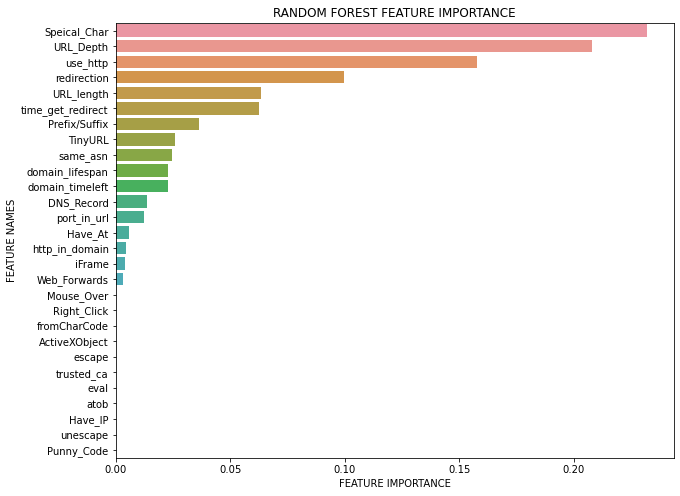

In [18]:
fi_df = var_imp

fi_df.sort_values(by=['importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['importance'], y=list(var_imp.to_dict('dict')['importance'].keys()))
#Add chart labels
plt.title('RANDOM FOREST FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [31]:
imp_fea = pd.DataFrame.from_dict(var_imp)
imp_fea.to_csv('importances.csv', encoding='utf-8')

# Testing

In [2]:
from feature_extraction import *

# classifier = joblib.load('rf_data_balance.pkl')
classifier = joblib.load('rf_final.pkl')

ext = Extractor()
url = "http://35.211.157.248/wordpress/wp-content/plugins/kcupikfcsj/adn/one%202"
Vector = np.array(ext(url)[:-1])
print(Vector)
prediction = classifier.predict(Vector.reshape(1, -1))
print(prediction)

C:\Users\Watch Dogs\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Watch Dogs\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


[]


ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.

In [144]:
black[0]

{'_id': '604bb52f6a1161c2e7d8608c',
 'url': 'http://2021-lmht.gq/*',
 'type': 'scam',
 'level': 'high',
 'meta': {}}

In [ ]:
for i in black:
    Vector = np.array(ext(i['url'])).reshape(1, -1)
    
    prediction = classifier.predict(Vector )
    print(prediction)

Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[0]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[0]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0

[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
Domain Age:  1826
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
Domain Age:  366
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[0]
Domain Age:  5843
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1,

[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
Domain Age:  731
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  731
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
Domain Age:  1096
[0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
Domain Age:  1096
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1

In [7]:
df_origin.head()

,url,labels
0,https://oriamna.weebly.com,1
1,https://support.office.com/?legRedir=true&amp;...,0
2,https://www.pinterest.com/48CATI/disfraces/,0
3,https://www.group-whatsapp.vloz4.com,1
4,http://www.chimiciveneto.it/nuovosito/images/f...,1


In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
import pickle

import random
from model import ConvModel

In [3]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
num_chars = len(tokenizer.word_index)+1
embedding_vector_length = 128
maxlen = 128
max_words = 20000

with tf.device('/cpu:0'):
    model_pre = "../checkpointModel/bestModelCNN"
    model = ConvModel(num_chars, embedding_vector_length, maxlen)
    model.built = True
    model.load_weights(model_pre)

In [4]:
def preprocess_url(url, tokenizer):
    url = url.strip()
    sequences = tokenizer.texts_to_sequences([url])
    word_index = tokenizer.word_index
    url_prepped = pad_sequences(sequences, maxlen=maxlen)
    
    return url_prepped

In [3]:
df_origin[0:100]

,url,labels
0,https://oriamna.weebly.com,1
1,https://support.office.com/?legRedir=true&amp;...,0
2,https://www.pinterest.com/48CATI/disfraces/,0
3,https://www.group-whatsapp.vloz4.com,1
4,http://www.chimiciveneto.it/nuovosito/images/f...,1
...,...,...
95,http://xgyul.codesandbox.io/index3.html,1
96,https://autoatendimento.caixaresidencial.com.br/,1
97,http://otomoto.pl/oferta/bmw-seria-3-bmw-e46-c...,0
98,https://plus.google.com/+aziznofficial,0


In [7]:
submit = []

for _ in df_origin['url'][0:100]:
#     prediction = model.predict(preprocess_url(_, tokenizer))
    submit.append(random.randint(0,1))
#     if prediction > 0.5:
#         submit.append(random.randint(0,1))
#         submit.append(1)
#     else:
#         submit.append(0)
#         submit.append(random.randint(0,1))

In [9]:
dataset = df_origin[0:100]
dataset['your'] = submit

<ipython-input-9-d2376f7c9db7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['your'] = submit


In [11]:
dataset.to_csv("testing.csv")